In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import matplotlib.colors as mc
import colorsys
from random import randint
import re

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("gdp per capita.csv")

Saving gdp per capita.csv to gdp per capita.csv


In [6]:

df = df.loc[df['Variable'] == 'GDP per capita in USA 2005 PPPs']
df = df[['Country', 'Time', 'Value']]
df = df.pivot(index='Country', columns='Time', values='Value')
df = df.reset_index()

In [10]:

df = pd.melt(df, id_vars='Country', var_name='Time')

In [11]:
frames_list = df["Time"].unique().tolist()
for i in range(10):
    frames_list.append(df['Time'].iloc[-1])

In [12]:
def transform_color(color, amount=0.5):
    try:
        c = mc.cnames[color]
    except:
        c = color
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


all_names = df['Country'].unique().tolist()
random_hex_colors = []
for i in range(len(all_names)):
    random_hex_colors.append('#' + '%06X' % randint(0, 0xFFFFFF))

rgb_colors = [transform_color(i, 1) for i in random_hex_colors]
rgb_colors_opacity = [rgb_colors[x] + (0.825,) for x in range(len(rgb_colors))]
rgb_colors_dark = [transform_color(i, 1.12) for i in random_hex_colors]

findfont: Font family ['Trebuchet MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Trebuchet MS'] not found. Falling back to DejaVu Sans.


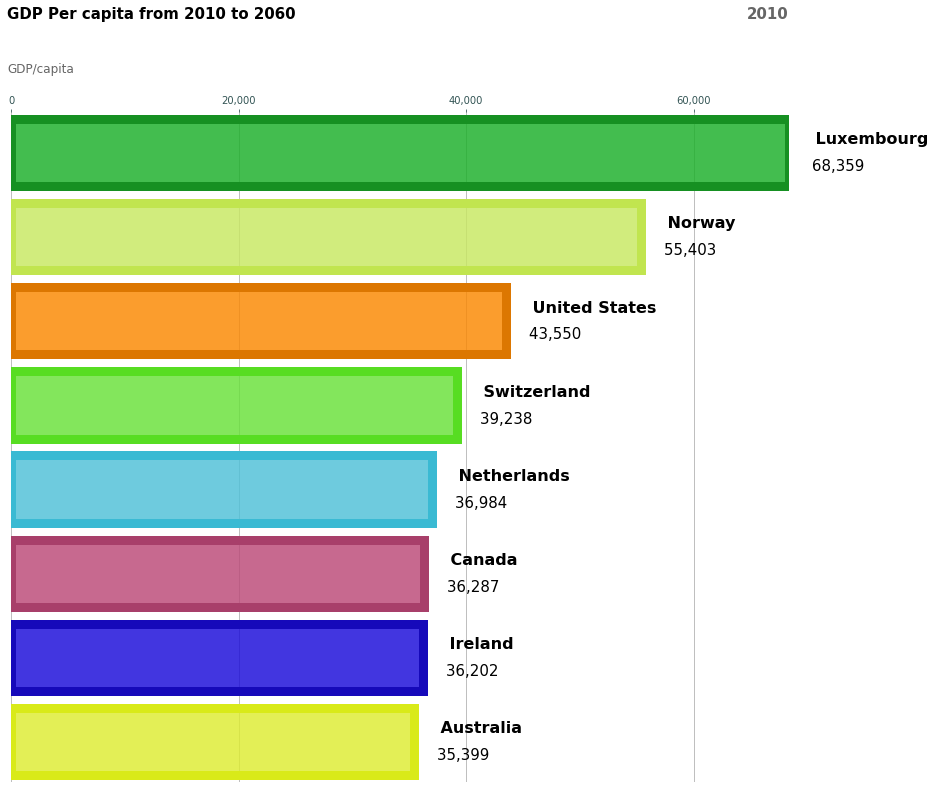

In [16]:
fig, ax = plt.subplots(figsize=(16, 12))

num_of_elements = 8


def draw_barchart(Time):
    df_frame = df[df['Time'].eq(Time)].sort_values(by='value', ascending=True).tail(num_of_elements)
    ax.clear()

    normal_colors = dict(zip(df['Country'].unique(), rgb_colors_opacity))
    dark_colors = dict(zip(df['Country'].unique(), rgb_colors_dark))

    ax.barh(df_frame['Country'], df_frame['value'], color=[normal_colors[x] for x in df_frame['Country']], height=0.8,
            edgecolor=([dark_colors[x] for x in df_frame['Country']]), linewidth='9')

    dx = float(df_frame['value'].max()) / 200

    for i, (value, name) in enumerate(zip(df_frame['value'], df_frame['Country'])):
        ax.text(value + dx, i + (num_of_elements / 50), '    ' + name,
                size=16, weight='bold', ha='left', va='center', fontdict={'fontname': 'Trebuchet MS'})
        ax.text(value + dx, i - (num_of_elements / 50), f'    {value:,.0f}', size=15, ha='left', va='center')

    time_unit_displayed = re.sub(r'\^(.*)', r'', str(Time))
    ax.text(1.0, 1.14, time_unit_displayed, transform=ax.transAxes, color='#666666',
            size=15, ha='right', weight='bold', fontdict={'fontname': 'Trebuchet MS'})
    ax.text(-0.005, 1.06, 'GDP/capita', transform=ax.transAxes, size=12, color='#666666')
    ax.text(-0.005, 1.14, 'GDP Per capita from 2010 to 2060', transform=ax.transAxes,
            size=15, weight='bold', ha='left', fontdict={'fontname': 'Trebuchet MS'})

    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#345555', labelsize=10)
    ax.set_yticks([])
    ax.set_axisbelow(True)
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')

    plt.locator_params(axis='x', nbins=4)
    plt.box(False)
    plt.subplots_adjust(left=0.075, right=0.75, top=0.825, bottom=0.05, wspace=0.2, hspace=0.2)
animator = animation.FuncAnimation(fig, draw_barchart, frames=frames_list)
plt.show()